<a href="https://colab.research.google.com/github/bahbi/Formacao-Data-Science/blob/main/Data_Science_analise_e_visualiza%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

retornar aqui: https://github.com/alura-cursos/introducao-a-data-science/tree/master/aula1.2

In [24]:
#importar o pandas
import pandas as pd
import seaborn as sns

sns.set()

In [2]:
#leitura do arquivo
notas = pd.read_csv("ratings.csv")

notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


In [3]:
#renomear as colunas

notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


In [4]:
#deixar as notas como únicas e contar os dados

notas['nota'].unique()
notas['nota'].value_counts()

4.0    23131
3.0    16772
5.0    11506
3.5    11037
4.5     7407
2.0     6430
2.5     4110
1.0     2354
1.5     1367
0.5     1156
Name: nota, dtype: int64

In [5]:
#obter a média e a mediana

print("Media",notas.nota.mean())

print("Mediana",notas.nota.median())

Media 3.5234959540283803
Mediana 3.5


Análise exploratória dos dados

analisar alguns filmes específicos do conjunto de dados

In [7]:
filmes = pd.read_csv("movies.csv")

filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
#renomear coluna

filmes.columns = ["filmeId", "titulo", "generos"]

filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Para obtermos as notas de um desses filmes — por exemplo, Toy Story —, precisaremos cruzar as informações entre os dataframes notas e filmes.

In [10]:
notas.query("filmeId==1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,9.649827e+08
516,5,1,4.0,8.474350e+08
874,7,1,4.5,1.106636e+09
1434,15,1,2.5,1.510578e+09
1667,17,1,4.5,1.305696e+09
...,...,...,...,...
83535,533,1,5.0,1.424754e+09
83573,534,1,4.0,1.459788e+09
84327,541,1,3.0,8.356430e+08
84603,544,1,3.0,8.506885e+08


In [11]:
notas.query("filmeId==1").nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
83535    5.0
83573    4.0
84327    3.0
84603    3.0
84780    4.0
Name: nota, Length: 188, dtype: float64

In [12]:
#agrupar todas as notas pela coluna filmeId

notas.groupby("filmeId")

In [13]:
notas.groupby("filmeId").mean()

,usuarioId,nota,momento
filmeId,,,
1,266.276596,3.933511,1.123207e+09
2,285.946809,3.398936,1.131901e+09
3,243.760870,3.282609,9.883575e+08
4,156.500000,2.500000,8.420487e+08
5,273.866667,3.111111,9.738044e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [14]:
# extrairmos somente a coluna nota.

notas.groupby("filmeId").mean()["nota"]

filmeId
1         3.933511
2         3.398936
3         3.282609
4         2.500000
5         3.111111
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 8757, dtype: float64

Para facilitarmos o entendimento dos dados, atribuiremos esse retorno a uma variável medias_por_filme (com underscore, que é o padrão do Python).

In [15]:
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()


filmeId
1    3.933511
2    3.398936
3    3.282609
4    2.500000
5    3.111111
Name: nota, dtype: float64

Text(0.5, 1.0, 'Histograma das médias dos filmes')

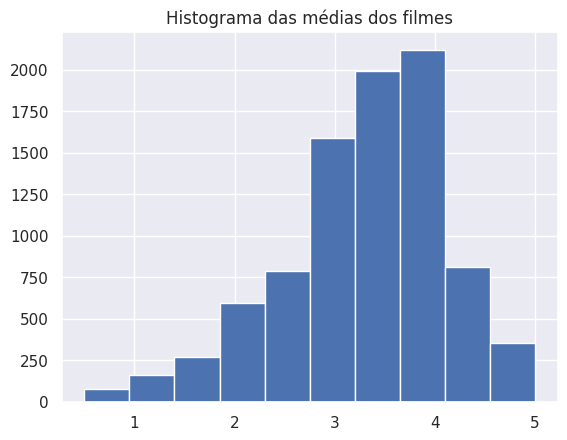

In [25]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")


<Axes: ylabel='nota'>

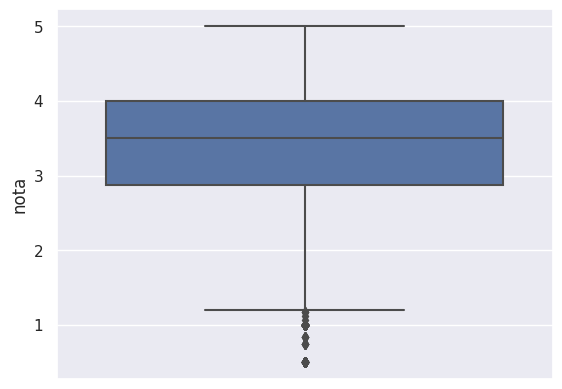

In [26]:
sns.boxplot(y=medias_por_filme)


medidas descritivas desses dados

In [20]:
medias_por_filme.describe()

count    8757.000000
mean        3.308397
std         0.867765
min         0.500000
25%         2.875000
50%         3.500000
75%         4.000000
max         5.000000
Name: nota, dtype: float64

<Axes: xlabel='nota', ylabel='Count'>

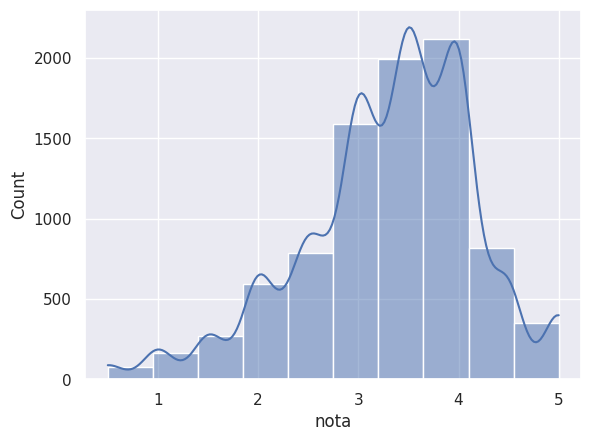

In [27]:
sns.histplot(medias_por_filme, kde=True, bins=10)